In [10]:
import xml.etree.ElementTree as ET
import glob

all_n_boxes = []
ann_names = glob.glob('Annotations/*.xml')

In [11]:
for ann in ann_names:
    tree = ET.parse(ann)
    root = tree.getroot()
    n_boxes = len(list(root.iter('bndbox')))
    all_n_boxes.append(n_boxes)

In [15]:
max_boxes = max(all_n_boxes)
all_n_boxes.remove(max_boxes)
print(max_boxes)

33


(array([2.226e+03, 5.050e+02, 2.710e+02, 7.400e+01, 1.300e+01, 1.400e+01,
        9.000e+00, 8.000e+00, 2.000e+00, 2.000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

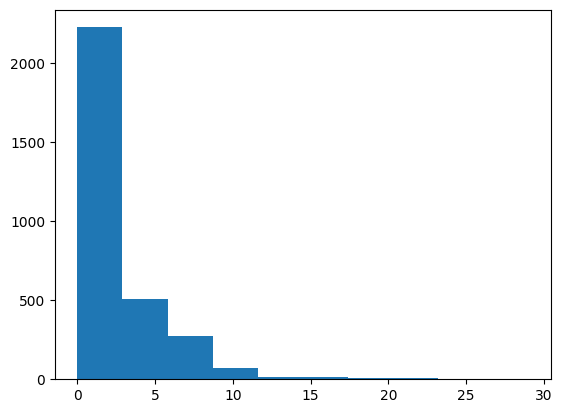

In [16]:
import matplotlib.pyplot as plt

plt.hist(all_n_boxes)

8